<a href="https://colab.research.google.com/github/Vidacelinda/DataMining_PCA-KPCA/blob/main/Carlo_Leiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library needed
Part 1.1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# from sklearn.decomposition import KernalPCA

#PCA
Part 1.1

In [6]:
#pca function
# from numpy import einsum
def my_pca(Data,k):
  #calculate mean of the input along each col(featuere)
  mean1=np.mean(Data,axis=0)

  #center data
  D1=Data-mean1

  #covaraince matrix of centered data
  cov=np.cov(D1,rowvar=False)

  #eigenvalues and eigenvectors of covaraince matrix
  eigenvalues,eigenvectors=np.linalg.eig(cov)

  #sort eigenvalues in descending order and rearrange those eigenvectors
  idx=np.argsort(eigenvalues)[::-1]
  eigenvalues=eigenvalues[idx]
  eigenvectors=eigenvectors[:,idx]

  #select top eigenvectors and reduce the dimensionalty
  reduced_eigenvectors=eigenvectors[:,:k]

  #project the centered data to the reduced eignvectors
  projecteddata=np.dot(D1,reduced_eigenvectors)

  return projecteddata,reduced_eigenvectors,mean1

#Clasification
Part 1.1

In [9]:
#calculate the distance between two points
def dis(x1,x2):
  return np.linalg.norm(x1-x2)

#classification
def myclassifier(Train,Trainlabel,Test):
  pred=[]
  for testpoint in Test:
    pred_dis=[]
    for trainpoint in Train:
      pred_dis.append(dis(testpoint,trainpoint))
    pred.append(Trainlabel[np.argmin(pred_dis)])
  return np.array(pred)

#Calculate accuracy
Part 1.1

In [10]:
def calculate_accuracy(true_labels,predicted_labels):
  if len(true_labels)!=len(predicted_labels):
    raise ValueError("Length of true_label must be the same.")
  #count the number of correct predictions
  correct_predictions=sum(1 for true, predicted in zip(true_labels,predicted_labels)if true == predicted)
  #calculate accuracy as the ratio of correct predictions to total predictions
  accuracy=correct_predictions / len(true_labels)
  return accuracy

#Read Files
Part 1.1 (Results)

In [13]:
#read data
Traindata=pd.read_csv('TrainData.csv')
TestData=pd.read_csv('TestData.csv')

Trainlabel=Traindata.iloc[:,-1]#out of all select last col
Testlabel=TestData.iloc[:,-1]

label1=Trainlabel.to_numpy()# classifier
label2=Testlabel.to_numpy()#added accuracy

Trainx=Traindata.iloc[::-1]#select all and start from back to front col
Testx=TestData.iloc[::-1]

Train=Trainx.to_numpy()
Test=Testx.to_numpy()

# label1=Trainlabel.to_numpy()
# label2=Testlabel.to_numpy()

# print(Train)
#*** STOP AND CHECK
#apply pca to train data
k = 110
project_train,reduced_eigenvectors,mean1=my_pca(Train,k) #CHECK AND DOWN ASWELL
#apply my_pca for
Test_centered=Test-mean1
projected_test=np.dot(Test_centered,reduced_eigenvectors)#
#apply classifier on my_pca
predict_label=myclassifier(project_train,label1,projected_test)
accuracy=calculate_accuracy(label2,predict_label)

percnetage_accuracy=accuracy*100
print(f"my PCA accuracy percentage {percnetage_accuracy:.2f} %")

my PCA accuracy percentage 88.50 %


#Sklearn PCA
Part 1.2 (Results)

In [22]:

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Read the data
Traindata = pd.read_csv('TrainData.csv')
TestData = pd.read_csv('TestData.csv')

# Extract features and labels
TrainX = Traindata.iloc[:, :-1].values
Trainy = Traindata.iloc[:, -1].values

TestX = TestData.iloc[:, :-1].values
Testy = TestData.iloc[:, -1].values

# sklearn PCA on the training data
pca = PCA(n_components=110)
project_train = pca.fit_transform(TrainX)

# Apply PCA on the test data
projected_test = pca.transform(TestX)

# Train a classifier (Logistic Regression)
classifier = LogisticRegression()
classifier.fit(project_train, Trainy)

# Predict using the transformed testing data
predicted_labels = classifier.predict(projected_test)

# Calculate and print the accuracy
accuracy = accuracy_score(Testy, predicted_labels)
percentage_accuracy = accuracy * 100
print(f"Sklearn PCA Accuracy percentage: {percentage_accuracy:.2f} %")



Sklearn PCA Accuracy percentage: 90.50 %


#KPCA RBF : Scratch
part 2.1 and 3.1

In [23]:
import numpy as np

def rbf_kernel(X, sigma=1.0):

    #RBF (Gaussian) kernel matrix.
    #X (numpy array): Input data matrix of shape (m, n), where m is the number of samples and n is the number of features.
    #sigma (float): Width parameter for the RBF kernel."""
    m = X.shape[0]
    K = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            K[i, j] = np.exp(-np.linalg.norm(X[i] - X[j]) ** 2 / (2 * sigma ** 2))

    # K (numpy array): RBF kernel matrix of shape (m, m).
    return K

def center_kernel_matrix(K):
    """
    Centers the kernel matrix.

    Parameters:
    K (numpy array): Input kernel matrix.

    Returns:
    K_centered (numpy array): Centered kernel matrix.
    """
    n = K.shape[0]
    one_n = np.ones((n, n)) / n
    K_centered = K - np.dot(one_n, K) - np.dot(K, one_n) + np.dot(np.dot(one_n, K), one_n)
    return K_centered

def kernel_pca(X, n_components, kernel='rbf', sigma=1.0):
    """
    Computes Kernel PCA.

    Parameters:
    X (numpy array): Input data matrix of shape (m, n), where m is the number of samples and n is the number of features.
    n_components (int): Number of components for the transformed data.
    kernel (str): Kernel type ('rbf' for RBF kernel).
    sigma (float): Width parameter for the RBF kernel.

    Returns:
    transformed_data (numpy array): Transformed data matrix of shape (m, n_components).
    """
    if kernel == 'rbf':
        K = rbf_kernel(X, sigma)
    else:
        raise ValueError("Unsupported kernel type. Use 'rbf' for RBF kernel.")

    K_centered = center_kernel_matrix(K)

    # Compute eigenvectors and eigenvalues
    eigvals, eigvecs = np.linalg.eig(K_centered)

    # Sort eigenvectors by eigenvalues in descending order
    idx = np.argsort(eigvals)[::-1]
    eigvecs_sorted = eigvecs[:, idx]

    # Select top k eigenvectors
    transformed_data = eigvecs_sorted[:, :n_components]

    return transformed_data

# Example usage
# training data TrainX
# n_components = 110  # Number of components
# sigma = 1.0  # RBF kernel parameter
# Compute Kernel PCA using RBF kernel
# transformed_train_data = kernel_pca(TrainX, n_components, kernel='rbf', sigma=sigma)


#Sklearn_KPCA RBF
part 2.1 and 3.1 (Comparing to Scratch work of KPCA RBF I made after this code cell)


In [24]:
import pandas as pd
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Read the data
Traindata = pd.read_csv('TrainData.csv')
TestData = pd.read_csv('TestData.csv')

# Extract features and labels
TrainX = Traindata.iloc[:, :-1].values
Trainy = Traindata.iloc[:, -1].values
TestX = TestData.iloc[:, :-1].values
Testy = TestData.iloc[:, -1].values

# sklearn Kernel PCA on the training data with RBF kernel
kpca = KernelPCA(kernel='rbf', n_components=110)
project_train = kpca.fit_transform(TrainX)

# Apply Kernel PCA on the test data
projected_test = kpca.transform(TestX)

# Scale the data
scaler = StandardScaler()
project_train_scaled = scaler.fit_transform(project_train)
projected_test_scaled = scaler.transform(projected_test)

# Train a classifier (Logistic Regression)
classifier = LogisticRegression()
classifier.fit(project_train_scaled, Trainy)

# Predict using the transformed testing data
predicted_labels = classifier.predict(projected_test_scaled)

# Calculate and print the accuracy
accuracy = accuracy_score(Testy, predicted_labels)
percentage_accuracy = accuracy * 100
print(f"sklearn KPCA RBF Accuracy percentage: {percentage_accuracy:.2f} %")

sklearn KPCA RBF Accuracy percentage: 2.50 %


#KPCA RBF :Scratch
part 2.1 and 3.1 - accuracy results

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Read the data
Traindata = pd.read_csv('TrainData.csv')
TestData = pd.read_csv('TestData.csv')

# Extract features and labels
TrainX = Traindata.iloc[:, :-1].values
Trainy = Traindata.iloc[:, -1].values
TestX = TestData.iloc[:, :-1].values
Testy = TestData.iloc[:, -1].values

# sklearn Kernel PCA on the training data with RBF kernel
kpca = KernelPCA(kernel='rbf', n_components=110)
project_train = kpca.fit_transform(TrainX)

# Apply Kernel PCA on the test data
projected_test = kpca.transform(TestX)

# Scale the data
scaler = StandardScaler()
project_train_scaled = scaler.fit_transform(project_train)
projected_test_scaled = scaler.transform(projected_test)

# Train a classifier (Logistic Regression)
classifier = LogisticRegression()
classifier.fit(project_train_scaled, Trainy)

# Predict using the transformed testing data
predicted_labels = classifier.predict(projected_test_scaled)

# Calculate and print the accuracy
accuracy = accuracy_score(Testy, predicted_labels)
percentage_accuracy = accuracy * 100
print(f"my KPCA RBF Accuracy percentage: {percentage_accuracy:.2f} %")


my KPCA RBF Accuracy percentage: 2.50 %


#KPCA polynomial_kernal form scratch
part 2.2 and 3.1 - KPCA polynomial function and accuraccy results.

In [26]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Polynomial Kernel Function
def polynomial_kernel(X, Y, degree=3):
    return (np.dot(X, Y.T) + 1) ** degree

# Center the Kernel Matrix
def center_kernel_matrix(K):
    n = K.shape[0]
    one_n = np.ones((n, n)) / n
    K_centered = K - np.dot(one_n, K) - np.dot(K, one_n) + np.dot(np.dot(one_n, K), one_n)
    return K_centered

# Kernel PCA with Polynomial Kernel
def kernel_pca_poly(X, n_components, degree=3):
    # Calculate the Polynomial kernel matrix
    K = polynomial_kernel(X, X, degree)

    # Center the kernel matrix
    K_centered = center_kernel_matrix(K)

    # Compute eigenvectors and eigenvalues
    eigvals, eigvecs = np.linalg.eig(K_centered)

    # Sort eigenvectors by eigenvalues in descending order
    idx = np.argsort(eigvals)[::-1]
    eigvecs_sorted = eigvecs[:, idx]

    # Select top k eigenvectors
    transformed_data = eigvecs_sorted[:, :n_components]

    return transformed_data

# Read the data
Traindata = pd.read_csv('TrainData.csv')
TestData = pd.read_csv('TestData.csv')

# Extract features and labels
TrainX = Traindata.iloc[:, :-1].values
Trainy = Traindata.iloc[:, -1].values
TestX = TestData.iloc[:, :-1].values
Testy = TestData.iloc[:, -1].values

# Kernel PCA with Polynomial kernel
n_components = 110  # Number of components
degree = 3  # Polynomial degree
project_train = kernel_pca_poly(TrainX, n_components, degree)

# Apply Kernel PCA on the test data
projected_test = kernel_pca_poly(TestX, n_components, degree)

# Scale the data
scaler = StandardScaler()
project_train_scaled = scaler.fit_transform(project_train)
projected_test_scaled = scaler.transform(projected_test)

# Train a classifier (Logistic Regression)
classifier = LogisticRegression()
classifier.fit(project_train_scaled, Trainy)

# Predict using the transformed testing data
predicted_labels = classifier.predict(projected_test_scaled)

# Calculate and print the accuracy
accuracy = accuracy_score(Testy, predicted_labels)
percentage_accuracy = accuracy * 100
print(f"my KPCA Polynomial Accuracy percentage: {percentage_accuracy:.2f} %")


my KPCA Polynomial Accuracy percentage: 3.50 %


#Sklearn_KPCA polynomial Kernel
part 2.2 and 3.1 (using to compare to my Scratch work of my KPCA Polynomial Kernal)

In [27]:
import pandas as pd
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Read the data
Traindata = pd.read_csv('TrainData.csv')
TestData = pd.read_csv('TestData.csv')

# Extract features and labels
TrainX = Traindata.iloc[:, :-1].values
Trainy = Traindata.iloc[:, -1].values
TestX = TestData.iloc[:, :-1].values
Testy = TestData.iloc[:, -1].values

# sklearn Kernel PCA on the training data with Polynomial kernel
kpca = KernelPCA(kernel='poly', degree=3, n_components=110)  # Using Polynomial kernel with degree 3
project_train = kpca.fit_transform(TrainX)

# Apply Kernel PCA on the test data
projected_test = kpca.transform(TestX)

# Scale the data
scaler = StandardScaler()
project_train_scaled = scaler.fit_transform(project_train)
projected_test_scaled = scaler.transform(projected_test)

# Train a classifier (Logistic Regression)
classifier = LogisticRegression()
classifier.fit(project_train_scaled, Trainy)

# Predict using the transformed testing data
predicted_labels = classifier.predict(projected_test_scaled)

# Calculate and print the accuracy
accuracy = accuracy_score(Testy, predicted_labels)
percentage_accuracy = accuracy * 100
print(f"sklearn KPCA Polynomial Accuracy percentage: {percentage_accuracy:.2f} %")


sklearn KPCA Polynomial Accuracy percentage: 87.00 %


#KPCA linear Kernel : scratch
part 2.3

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Linear Kernel Function
def linear_kernel(X, Y):
    return np.dot(X, Y.T)

# Center the Kernel Matrix
def center_kernel_matrix(K):
    n = K.shape[0]
    one_n = np.ones((n, n)) / n
    K_centered = K - np.dot(one_n, K) - np.dot(K, one_n) + np.dot(np.dot(one_n, K), one_n)
    return K_centered

# Kernel PCA with Linear Kernel
def kernel_pca_linear(X, n_components):
    # Calculate the Linear kernel matrix
    K = linear_kernel(X, X)

    # Center matrix
    K_centered = center_kernel_matrix(K)

    eigvals, eigvecs = np.linalg.eig(K_centered)

    idx = np.argsort(eigvals)[::-1]
    eigvecs_sorted = eigvecs[:, idx]

    transformed_data = eigvecs_sorted[:, :n_components]

    return transformed_data

# Read the data
Traindata = pd.read_csv('TrainData.csv')

# Extract features and labels
TrainX = Traindata.iloc[:, :-1].values

# Kernel PCA with Linear kernel
n_components = 110  # Number of components
project_train = kernel_pca_linear(TrainX, n_components)

# Print transformed data for verification
print("Transformed data (first 5 rows):")
print(project_train[:5])



Transformed data (first 5 rows):
[[ 5.50754689e-02 -6.97958885e-02 -1.17073696e-01 -4.59802784e-02
  -2.06216876e-02  3.73373512e-02  6.67687532e-02  2.66483643e-02
   1.13930946e-01  9.45030937e-02 -3.18857240e-02 -2.21127324e-02
   8.91550087e-02  5.78896381e-02 -8.15920971e-02  1.97074325e-02
  -1.66449361e-02 -1.41803377e-02 -5.98313433e-03 -1.01776189e-04
   1.20531222e-01  5.40112038e-02  7.37194605e-02  3.36698533e-02
   7.59870029e-02 -6.23172939e-02 -1.15014118e-01  3.63992653e-02
   4.01684074e-02 -1.59510585e-02  4.37717159e-02 -2.95860077e-02
   1.10919216e-01 -4.01798298e-02  5.97400664e-02  4.21001899e-02
   6.08933910e-02  7.90193925e-03  4.30642705e-02 -1.16818645e-01
   8.94703305e-02  5.54122919e-02 -2.71663620e-02 -1.70618795e-02
  -2.51822374e-02 -6.80929428e-02 -9.94237568e-02 -7.17446614e-02
  -6.27666939e-02 -2.85228594e-02  1.27952045e-01 -3.32198863e-02
  -1.03387681e-02  6.03453605e-02  1.62571530e-01  6.32684681e-02
  -2.98557830e-02 -4.45079620e-02 -4.518405

#Sklearn KPCA linear Kernel
part 2.3

In [21]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

# Read the data
Traindata = pd.read_csv('TrainData.csv')

# Extract features and labels
TrainX = Traindata.iloc[:, :-1].values

# Linear Kernel PCA
n_components = 110  # Number of components

# Use 'linear' kernel for Linear Kernel PCA
kpca = KernelPCA(kernel='linear', n_components=n_components)

# Fit and transform the data
project_train = kpca.fit_transform(TrainX)

# Print transformed data for verification
print("Transformed data (first 5 rows):")
print(project_train[:5])


Transformed data (first 5 rows):
[[ 1.36240472e+03 -1.41001500e+03 -1.78687541e+03  6.25406890e+02
   2.67726312e+02 -3.88312936e+02 -6.24476326e+02  2.45615803e+02
  -9.42942947e+02  7.23005035e+02  2.35515112e+02  1.46874206e+02
   5.68975288e+02  3.57358325e+02 -4.84663930e+02  1.12171321e+02
  -9.32622614e+01 -7.61817102e+01 -3.07585312e+01  5.06221788e-01
   5.95252190e+02  2.54056084e+02 -3.37091649e+02  1.49962460e+02
   3.36100793e+02  2.66438238e+02 -4.80516213e+02 -1.50439222e+02
   1.63156214e+02 -6.31287313e+01 -1.69148922e+02 -1.10878470e+02
  -4.14572743e+02 -1.46873743e+02 -2.16188565e+02  1.51533642e+02
   2.16446538e+02  2.69637402e+01 -1.46545255e+02 -3.90093919e+02
   2.97305335e+02  1.82847831e+02  8.58302182e+01 -5.33790287e+01
  -7.85159984e+01  2.10999175e+02  3.01660226e+02  2.15819598e+02
  -1.85075575e+02  8.36084292e+01  3.67352206e+02 -9.44788903e+01
   2.91226958e+01  1.67661365e+02 -4.44856436e+02  1.69596756e+02
  -7.97716335e+01  1.16131868e+02  1.168729

#Classification Experiment
part 3.2

Text(0.5, 1.0, 'Accuracy Computation plot')

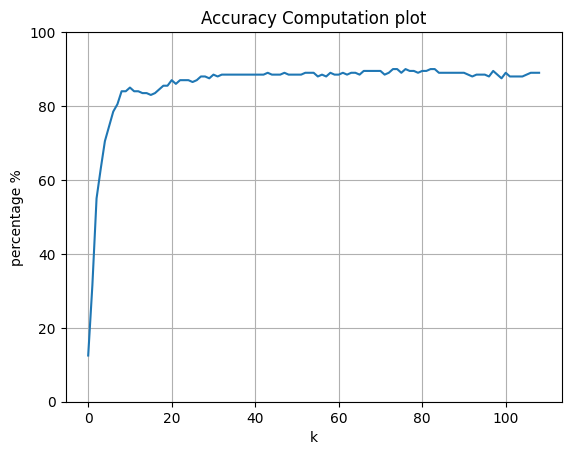

In [5]:
#calculate the distance between two points
def dis(x1,x2):
  return np.linalg.norm(x1-x2)

#classification
def myclassifier(Train,Trainlabel,Test):
  pred=[]
  for testpoint in Test:
    pred_dis=[]
    for trainpoint in Train:
      pred_dis.append(dis(testpoint,trainpoint))
    pred.append(Trainlabel[np.argmin(pred_dis)])
  return np.array(pred)

def calculate_accuracy(true_labels,predicted_labels):
  if len(true_labels)!=len(predicted_labels):
    raise ValueError("Length of true_label must be the same.")
  #count the number of correct predictions
  correct_predictions=sum(1 for true, predicted in zip(true_labels,predicted_labels)if true == predicted)
  #calculate accuracy as the ratio of correct predictions to total predictions
  accuracy=correct_predictions / len(true_labels)
  return accuracy

#read Train data and Test Data
Traindata=pd.read_csv('TrainData.csv')
Testdata=pd.read_csv('TestData.csv')

#we need to saperate data from labels
Y_train=Traindata.iloc[:,-1]#save the label train
Train=Traindata.iloc[:,:-1].to_numpy()
y_test=Testdata.iloc[:,-1]
Test=Testdata.iloc[:,:-1].to_numpy()
accuracies=[]
for k in range(1,110):
  pca=PCA(n_components=k)
  pca.fit(Train)
  reduced_train=pca.transform(Train)
  reduce_test=pca.transform(Test)
  pred=myclassifier(reduced_train,Y_train,reduce_test)
  accuracy=calculate_accuracy(y_test,pred)
  accuracies.append(accuracy*100)
accuracies=np.array(accuracies)
plt.plot(accuracies)
plt.ylim([0,100])
plt.xlabel('k')
plt.ylabel('percentage %')
plt.grid()
plt.title('Accuracy Computation plot')

#Conclusion
Principal Component Analysis (PCA) is a linear technique that reduces high-dimensional data to a lower-dimensional space by identifying orthogonal components capturing maximum variance.

Kernel Principal Component Analysis (KPCA) extends PCA for non-linear data by mapping it to a higher-dimensional space using a kernel function, enabling effective dimensionality reduction and non-linear pattern capture.

In summary, PCA is for linear dimensionality reduction, while KPCA extends this to non-linear data using kernel-based transformations for enhanced analysis.